# Testes da rotina da classe do Sistema de Lorenz

## 1. Importando as bibliotecas necessárias

### Bibliotecas obrigatórias

In [1]:
import numpy as np
from scipy.integrate import odeint

%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns # a biblioteca 'seaborn' contém vários estilos para os gráficos do 'matpĺotlib'

# agora, melhoramos a qualidade de saida e de visualizacao da imagem 
# alem de mudar a fonte padrao para uma do latex
sns.set_style("ticks")
plt.rcParams['savefig.dpi'] = 200
plt.rcParams["figure.dpi"] = 150

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
plt.style.use('dark_background')

### Bibliotecas não-obrigatórias

In [2]:
import sys 
sys.path.insert(0, '../../../scripts')
import lorenzsystem as lsys

## 2. Definindo a função (debug)

Não é necessário executar essa linha se você estiver importando o arquivo com a classe.

In [3]:
class SistemaLorenz:
    
    def __init__(self, estado_inicial, sigma=10, beta=8/3, rho=28, dt=0.0001):
        """
        Descrição:
        ----------
        Construtor da classe 'SistemaLorenz'

        Parâmetros:
        -----------
        estado_inicial: np.ndarray
            Vetor das posições xyz iniciais do sistema        
        sigma: int ou float
            Parâmetro do Sistema de Lorenz
        beta: int ou float
            Parâmetro do Sistema de Lorenz
        rho: int ou float
            Parâmetro do Sistema de Lorenz
        dt: float
            Tamanho do diferencial de tempo que iremos utilizar nos cálculos, ou seja, a resolução temporal de nossa solução
            
        Retorna:
        --------
        Nada
        """
        
        if not (type(estado_inicial) is np.ndarray):
            raise TypeError("O vetor estado inicial deve ser um array do numpy!") 
        
        if not (((type(sigma) is int) | (type(sigma) is float)) & (sigma > 0)):
            raise TypeError("Sigma deve ser um int ou float positivo!")

        if not (((type(beta) is int) | (type(beta) is float)) & (beta > 0)):
            raise TypeError("Beta deve ser um int ou float positivo!")

        if not (((type(rho) is int) | (type(rho) is float)) & (rho > 0)):
            raise TypeError("Rho deve ser um int ou float positivo!")
            
        if not ((type(dt) is float) & (dt > 0)):
            raise TypeError("dt deve ser um float positivo!")
        
        self._estado_inicial = estado_inicial
        self._sigma = sigma
        self._beta = beta
        self._rho = rho
        self._dt = dt
        pass
    
    def _equacoes(self, estado_atual, t):
        """
        Descrição:
        ----------
        Função interna que retorna as equações do Sistema de Lorenz calculadas no instante t atual
        
        Parâmetros:
        -----------
        estado_atual: np.ndarray
            Vetor das posições xyz atuais do sistema    
        t: float
            Instante t no qual estamos calculando as derivadas
            
        Retorna:
        --------
        Um sistema de EDOs de Lorenz para os parâmetros estimados na forma de um array
        """
        
        if not (type(estado_atual) is np.ndarray):
            raise TypeError("O vetor estado atual deve ser um array do numpy!")        
        
        if not (type(t) is float):
            raise TypeError("t deve ser um float!")
        
        sigma = self._sigma
        beta = self._beta
        rho = self._rho
        x, y, z = estado_atual
        
        dx_dt = sigma * (y - x)
        dy_dt = x * (rho - z) - y
        dz_dt = x * y - beta * z
        return [dx_dt, dy_dt, dz_dt]
    
    def calcular(self, t_inicial, t_final):
        """
        Descrição:
        ----------
        Evolui o sistema de Lorenz com base nas condições iniciais configuradas, para um t indo de t_inicial até t_final, com n_instantes calculados
        
        Parâmetros:
        -----------
        t_inicial: int
            Instante temporal em que iniciamos os cálculos
        t_final: int
            Instante temporal em que terminamos os cálculos
            
        Retorna:
        --------
        Um vetor com as soluções estimadas e um vetor com os instantes temporais utilizados
        """
        
        if not ((type(t_inicial) is int) & (t_inicial >= 0)):
            raise TypeError("t_inicial deve ser um int não nulo!")
            
        if not ((type(t_final) is int) & (t_final > 0)):
            raise TypeError("t_final deve ser um int positivo!")        
        
        estado_inicial = self._estado_inicial
        dt = self._dt
        
        n_instantes = int((t_final - t_inicial)/dt)
        instantes_temporais = np.linspace(t_inicial, t_final, n_instantes)
        
        solucoes = odeint(self._equacoes, t=instantes_temporais, y0=estado_inicial)
        return solucoes, instantes_temporais

## 3. Testando com o atrator de Lorenz

In [4]:
t_inicial = 0
t_final = 100
dt = 0.001

In [5]:
estado_inicial = np.array([0.1, 0, 0])

In [6]:
sis_lorenz = lsys.SistemaLorenz(estado_inicial, dt=dt)

In [7]:
solucoes, instantes_temporais = sis_lorenz.calcular(t_inicial = t_inicial, t_final = t_final)

In [8]:
x = solucoes[:, 0]
y = solucoes[:, 1]
z = solucoes[:, 2]

### 3.a) Diagrama de Fases

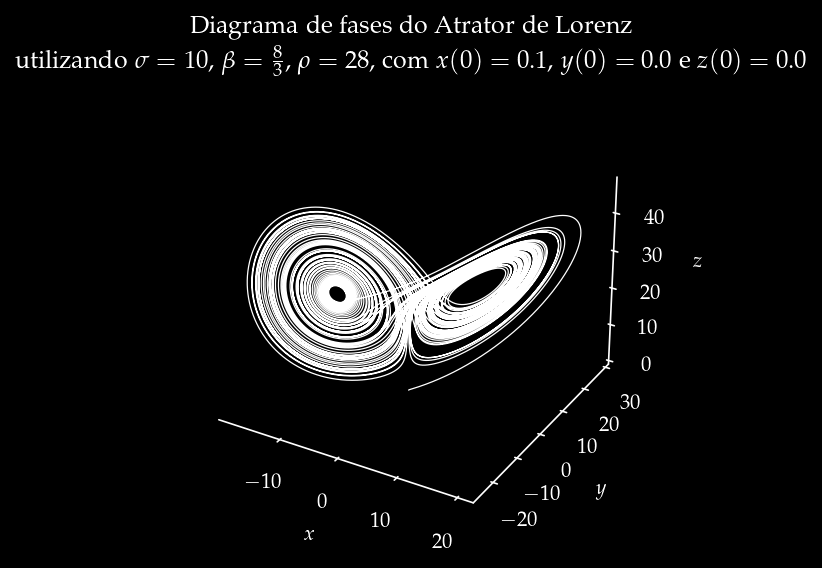

In [9]:
fig, ax = plt.subplots()
ax = plt.axes(projection='3d')
ax.plot(x, y, z, alpha=1, linewidth=0.6, color='White')
ax.set_title("Diagrama de fases do Atrator de Lorenz\n utilizando $\sigma = 10$, " + r"$\beta =\frac{8}{3}$, " + r"$\rho=28$, com " + "$x(0) =$ " + str(estado_inicial[0]) + ", $y(0) = $ " + str(estado_inicial[1]) + " e $z(0) =$ " + str(estado_inicial[2]))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.w_xaxis.set_pane_color((0, 0, 0, 0))
ax.w_yaxis.set_pane_color((0, 0, 0, 0))
ax.w_zaxis.set_pane_color((0, 0, 0, 0))

ax.grid(False)
sns.despine()
plt.show()
fig.savefig("../../../images/caos/lorenz/diagrama-de-fases.png")

### 3.b) Séries Temporais

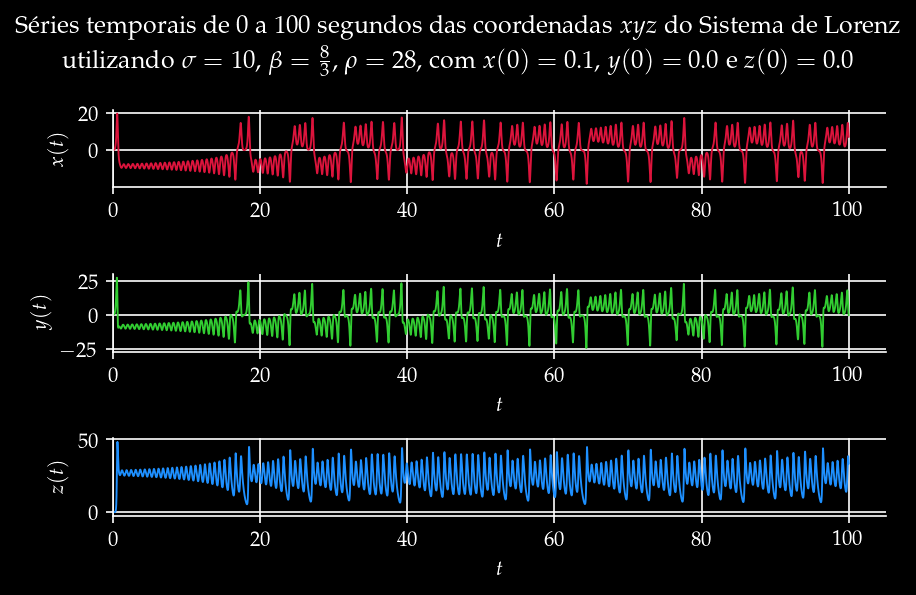

In [11]:
fig, ax = plt.subplots(3)
fig.suptitle("Séries temporais de 0 a 100 segundos das coordenadas $xyz$ do Sistema de Lorenz\n utilizando $\sigma = 10$, " + r"$\beta =\frac{8}{3}$, " + r"$\rho=28$, com " + "$x(0) =$ " + str(estado_inicial[0]) + ", $y(0) = $ " + str(estado_inicial[1]) + " e $z(0) =$ " + str(estado_inicial[2]))
ax[0].plot(instantes_temporais, x, color='Crimson', linewidth=0.9)

ax[0].set_ylabel('$x(t)$')
ax[0].set_xlabel('$t$')
ax[0].set_xlim(0,)
    
ax[0].grid(True)

ax[1].plot(instantes_temporais, y, color='LimeGreen', linewidth=0.9)
ax[1].set_ylabel('$y(t)$')
ax[1].set_xlabel('$t$')
ax[1].set_xlim(0,)
ax[1].grid(True)

ax[2].plot(instantes_temporais, z, color='DodgerBlue', linewidth=0.9)
ax[2].set_ylabel('$z(t)$')
ax[2].set_xlabel('$t$')
ax[2].set_xlim(0,)
ax[2].grid(True)

sns.despine()
plt.tight_layout() 
plt.show()
fig.savefig("../../../images/caos/lorenz/series-temporais.png")